# Modeling Cdc2 - Cyclin interactions

This workshop aims to provide attendees hands-on experince with PySB. This example demonstrates how one can implement and simulate a biological system model using PySB. In this example, a simple model of cyclin - cdc2 cycle will be implemented and simulated.

## Background

### Simplified Cdc2 - Cyclin interaction model:
Cdc2 and Cyclin controls major events in cell cycle. Activation of Cdc2/Cyclin complexes is responsible for mitosis. For the biological details and the model, see [Tyson, 1991](https://doi.org/10.1073/pnas.88.16.7328). The following diagram demonstrates the model details:  

<img src="cdc2_cyclin_model.png" width="800" height="1200">


#### Interaction steps:
    (1): Cyclin is synthesized de novo: 
        (None --> cyclin)
    (2): Newly synthesized cyclin may be unstable: 
        (cyclin --> None)
    (3): Cyclin binds to cdc2-P to form "pre-Maturation Promoting Factor (MPF). At some point after heterodimer formation, the cyclin subunit is phosphorylated: 
        (cyclin + cdc2-P --> cyclin-P:cdc2-P)
    (4-5): The cdc2 subunit is then reversibly dephosphorylated to form active-MPF: 
        (cyclin-P:cdc2-P <--> cyclin-P:cdc2)
    (Dashed-arrow): Two active-MPF enhance the catalytic activity of the phosphatase: 
        (cyclin-P:cdc2 + cyclin-P:cdc2 + cyclin-P:cdc2-P --> cyclin-P:cdc2 + cyclin-P:cdc2 + cyclin-P:cdc2)
    (6): Nuclear division is triggered when a sufficient quantity of MPF has been activated and concurrently active MPF is destroyed: 
        (cyclin-P:cdc2 --> cyclin-P + cdc2)
    (7): After breakdown of the MPF complex, released phosphorylated cyclin is subject to rapid proteolysis: 
        (cyclin-P --> None)
    (8-9): The cdc2 subunit is reversibly phosphorylated, and the cycle repeats itself: 
        (cdc2 <--> cdc2-P)

### Instructions
Create the "species" of the model, represented as `Monomers` in PySB:
    
    cyclin: it can have two states (unphospho and phospho) and it can bind to cdc2
    cdc2: it can have two states (unphospho and phospho) and it can bind to cyclin
    
Parameters: (note that the following parameter values are computed considering cell volume = 1e-20 and Avogadro constant = 6.02214076e+23)

    'k1': cyclin synthesis rate, 90.33 (Step1)
    'k2': unstable cyclin degredation rate, 1e-10 (Step 2)
    'k3': cyclin:cdc2-p binding rate (pre-MPF formation), 3.32e-2 (Step 3)
    'k4': MPF activation rate, 1.8e-2 (Step 4)
    'k5': MPF inactivation rate, 1e-10 (Step 5)
    'k_dash': Autocatalysis rate, 9.9266e-6
    'k6': cyclin-P:cdc2 dissociation rate, 1 (Step 6)
    'k7': cyclin-P degredation rate, 1e1 (Step 7)
    'k8': cdc2 phosphorylation rate, 1e6
    'k9': cdc2 dephosphorylation rate, 1e3
    
Initial values:
    
    cyclin: Assume initially there exists 1500 copies of unphosphorylated free cyclin
    cdc2: Assume initially there exists 6000 copies of phosphorylated free cdc2
    
Outputs: 

    Track total cyclin and active cyclin (i.e., the active MPF)

Please read and underrstand the model and type PySB commands to represent this system. Then, simulate the system for `0 to 100 mins` considering `10000` time-point samples. You can use the [PySB Tutorial](https://pysb.readthedocs.io/en/stable/tutorial.html#) for explanations and examples of the individual model components.

In [1]:
# import the pysb module:
from pysb import *

In [2]:
# instantiate a model:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0, energypatterns: 0) at 0x7f81201d5730>

## Declare Monomers

Monomers are the components whose behavior is intended to be modeled in the system.

In [3]:
# declare monomer for cyclin:
# Hint: cyclin has one binding site and can be in two states.
Monomer('cyclin', ['b', 's'], {'s': ['u', 'p']})

Monomer('cyclin', ['b', 's'], {'s': ['u', 'p']})

In [4]:
# declare monomer for cdc2: 
# Hint: cdc2 has one binding site and can be in two states.
Monomer('cdc2', ['b', 's'], {'s': ['u', 'p']})

Monomer('cdc2', ['b', 's'], {'s': ['u', 'p']})

## Declare Parameters

The parameters are the rate constants of the model.

In [5]:
# define k1 (cyclin synthesis rate): 
Parameter('k1', 90.33)

Parameter('k1', 90.33)

In [6]:
# define k2 (unstable cyclin degredation rate): 
Parameter('k2', 1e-10)

Parameter('k2', 1e-10)

In [7]:
# define k3 (cyclin:cdc2-p binding rate): 
Parameter('k3', 3.32e-2)

Parameter('k3', 0.0332)

In [8]:
# define k4 (MPF activation rate): 
Parameter('k4', 1.8e-2)

Parameter('k4', 0.018)

In [9]:
# define k5 (MPF inactivation rate): 
Parameter('k5', 1e-10)

Parameter('k5', 1e-10)

In [10]:
# define k_dash (Autocatalysis rate): 
Parameter('k_dash', 9.9266e-6)

Parameter('k_dash', 9.9266e-06)

In [11]:
# define k6 (cyclin-P:cdc2 dissociation rate): 
Parameter('k6', 1)

Parameter('k6', 1.0)

In [12]:
# define k7 (cyclin-P degredation rate): 
Parameter('k7', 1e1)

Parameter('k7', 10.0)

In [13]:
# define k8 (cdc2 phosphorylation rate): 
Parameter('k8', 1e6)

Parameter('k8', 1000000.0)

In [14]:
# define k9 (cdc2 dephosphorylation rate): 
Parameter('k9', 1e3)

Parameter('k9', 1000.0)

## Declare Initial Conditions

The initial conditions indicate how much non-zero initial species are present at time t = 0 in the system.

In [15]:
# declare initial value for cyclin:
Initial(cyclin(b=None, s='u'), Parameter('init_u_cyclin', 1505))

Initial(cyclin(b=None, s='u'), init_u_cyclin)

In [16]:
# declare initial value for cdc2:
Initial(cdc2(b=None, s='p'), Parameter('init_p_cdc2', 6022))

Initial(cdc2(b=None, s='p'), init_p_cdc2)

## Declare Rules of the Model

Rules define how the individual components (Monomers) of the system interacts with each other.
Hint: In this model, all the rules are forward interactions only!

In [17]:
# write the rule for de novo cyclin synthesis (None --> cyclin) with rate k1:
# Note: synthesized cylin should be in unbound, unphosphorylated form.
Rule('cyclin_synth', None >> cyclin(b=None, s='u'), k1)

Rule('cyclin_synth', None >> cyclin(b=None, s='u'), k1)

In [18]:
# write the rule for degradation of unstable newly synthesized cyclin (cyclin --> None) with rate k2:
Rule('cyclin_deg', cyclin(b=None, s='u') >> None, k2)

Rule('cyclin_deg', cyclin(b=None, s='u') >> None, k2)

In [19]:
# write the rule for pre-Maturation Promoting Factor (MPF) formation 
# (cyclin + cdc2-P --> cyclin-P:cdc2-P) with rate k3:
Rule('pre_MPF', cyclin(b=None, s='u') + cdc2(b=None, s='p') >> cyclin(b=1, s='p') % cdc2(b=1, s='p'), k3)

Rule('pre_MPF', cyclin(b=None, s='u') + cdc2(b=None, s='p') >> cyclin(b=1, s='p') % cdc2(b=1, s='p'), k3)

In [20]:
# write the rule for reversible MPF activation (cyclin-P:cdc2-P <--> cyclin-P:cdc2) 
# with forward rate k4 and reverse rate k5:
Rule('MPF_activation', cyclin(b=1, s='p') % cdc2(b=1, s='p') | cyclin(b=1, s='p') % cdc2(b=1, s='u'), k4, k5)

Rule('MPF_activation', cyclin(b=1, s='p') % cdc2(b=1, s='p') | cyclin(b=1, s='p') % cdc2(b=1, s='u'), k4, k5)

In [21]:
# write the rule for active MPF self-enhancement 
# (cyclin-P:cdc2 + cyclin-P:cdc2 + cyclin-P:cdc2-P --> cyclin-P:cdc2 + cyclin-P:cdc2 + cyclin-P:cdc2)
# with rate k_dash:
Rule('MPF_self_activation', 
     cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='p') >>
     cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='u'),
     k_dash
    )

Rule('MPF_self_activation', cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='p') >> cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='u') + cyclin(b=1, s='p') % cdc2(b=1, s='u'), k_dash)

In [22]:
# write the rule for active MPF destruct (cyclin-P:cdc2 --> cyclin-P + cdc2) with rate k6:
Rule('MPF_destruct', cyclin(b=1, s='p') % cdc2(b=1, s='u') >> cyclin(b=None, s='p') + cdc2(b=None, s='u'), k6)

Rule('MPF_destruct', cyclin(b=1, s='p') % cdc2(b=1, s='u') >> cyclin(b=None, s='p') + cdc2(b=None, s='u'), k6)

In [24]:
# write the rule for cyclin-p degradation (cyclin-P --> None) with rate k7:
Rule('cyclin_proteolysis', cyclin(b=None, s='p') >> None, k7)

Rule('cyclin_proteolysis', cyclin(b=None, s='p') >> None, k7)

In [25]:
# write the rule for reversable cdc2 phosphorylation (cdc2 <--> cdc2-P) 
# with forward k8 and reverse rate k9:
Rule('cdc2_phos_dephos', cdc2(b=None, s='u') | cdc2(b=None, s='p'), k8, k9)

Rule('cdc2_phos_dephos', cdc2(b=None, s='u') | cdc2(b=None, s='p'), k8, k9)

## Declare the Observables

Observables track the system components (Monomers) that we like to monitor and returns after model is simulated.

In [26]:
# define observable for total cyclin:
# Hint: no matter how many sites/states a monomer has, calling a monomer with an empty paramtheses 
# will consider all forms of the monomer (e.g. A())
Observable('cyclin_total', cyclin())

Observable('cyclin_total', cyclin())

In [27]:
# define observable for active cyclin (i.e., the active MPF):
# Hint: the observable does not have to be an individual monomer, it can be any complex.
Observable('cyclin_active', cyclin(b=1, s='p') % cdc2(b=1, s='u'))

Observable('cyclin_active', cyclin(b=1, s='p') % cdc2(b=1, s='u'))

## Simulate the Model

In [28]:
# Import Scipy Ode Simulator from PySB library
from pysb.simulator import ScipyOdeSimulator
from pylab import *

In [29]:
# Create simulation time 0-100 mins with 10000 time-point samples (use linspace(a, b, N)):
t = linspace(0, 100, 10001)

In [30]:
# Input model and time to ScipyOdeSimulator and run the model:
sim = ScipyOdeSimulator(model).run(tspan=t)
simResults = sim.all

## Plot the Simulation Results

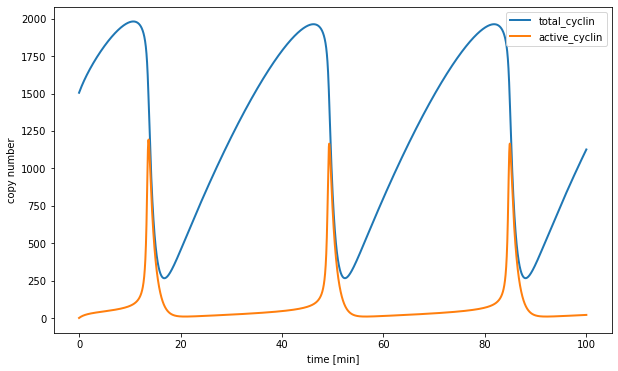

In [31]:
# import matplotlib library
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(t, simResults['cyclin_total'], lw=2, label='total_cyclin')
plt.plot(t, simResults['cyclin_active'], lw=2, label='active_cyclin')

plt.legend(loc='best')
plt.xlabel('time [min]')
plt.ylabel('copy number')

plt.show()